# Rock Density

The objective is to estimate what is the density of a rock by using rebound signal strength (nHz).
Knowing the density of rock can help determine what mining equipment to use.

This time a comparison between different Machine Learning algorithms is made.

## Import libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.pipeline import make_pipeline

## Import and explore data

In [2]:
df = pd.read_csv('../data/rock_density_xray.csv')

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rebound Signal Strength nHz  300 non-null    float64
 1   Rock Density kg/m3           300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [5]:
df.isnull().sum()

Rebound Signal Strength nHz    0
Rock Density kg/m3             0
dtype: int64

In [6]:
df.columns = ['Signal', 'Density']

## Plot exploration

<Axes: xlabel='Signal', ylabel='Density'>

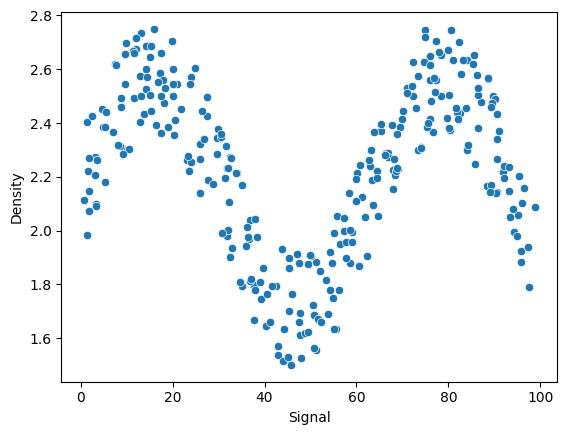

In [7]:
sns.scatterplot(x='Signal', y='Density', data=df)

### Observation:
There seems to be a periodical pattern in the data. One similar to a sine wave.

## Data preparation for the algorithm

In [8]:
X = df['Signal'].values.reshape(-1, 1)
y = df['Density']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

## Models

In [9]:
def run_model(model, X_train, y_train, X_test, y_test):
	model.fit(X_train, y_train)

	preds = model.predict(X_test)
	rmse = np.sqrt(mean_squared_error(y_test, preds))
	mae = mean_absolute_error(y_test, preds)
	print(f'RMSE: {rmse}')
	print(f'MAE: {mae}')

	signal_range = np.arange(0, 100)
	signal_preds = model.predict(signal_range.reshape(-1, 1))
	plt.figure(figsize=(12,8), dpi=200)
	sns.scatterplot(x='Signal', y='Density', data=df, color='black')
	plt.plot(signal_range, signal_preds)

### Linear regression

RMSE: 0.31715063679170175
MAE: 0.2630059641510617


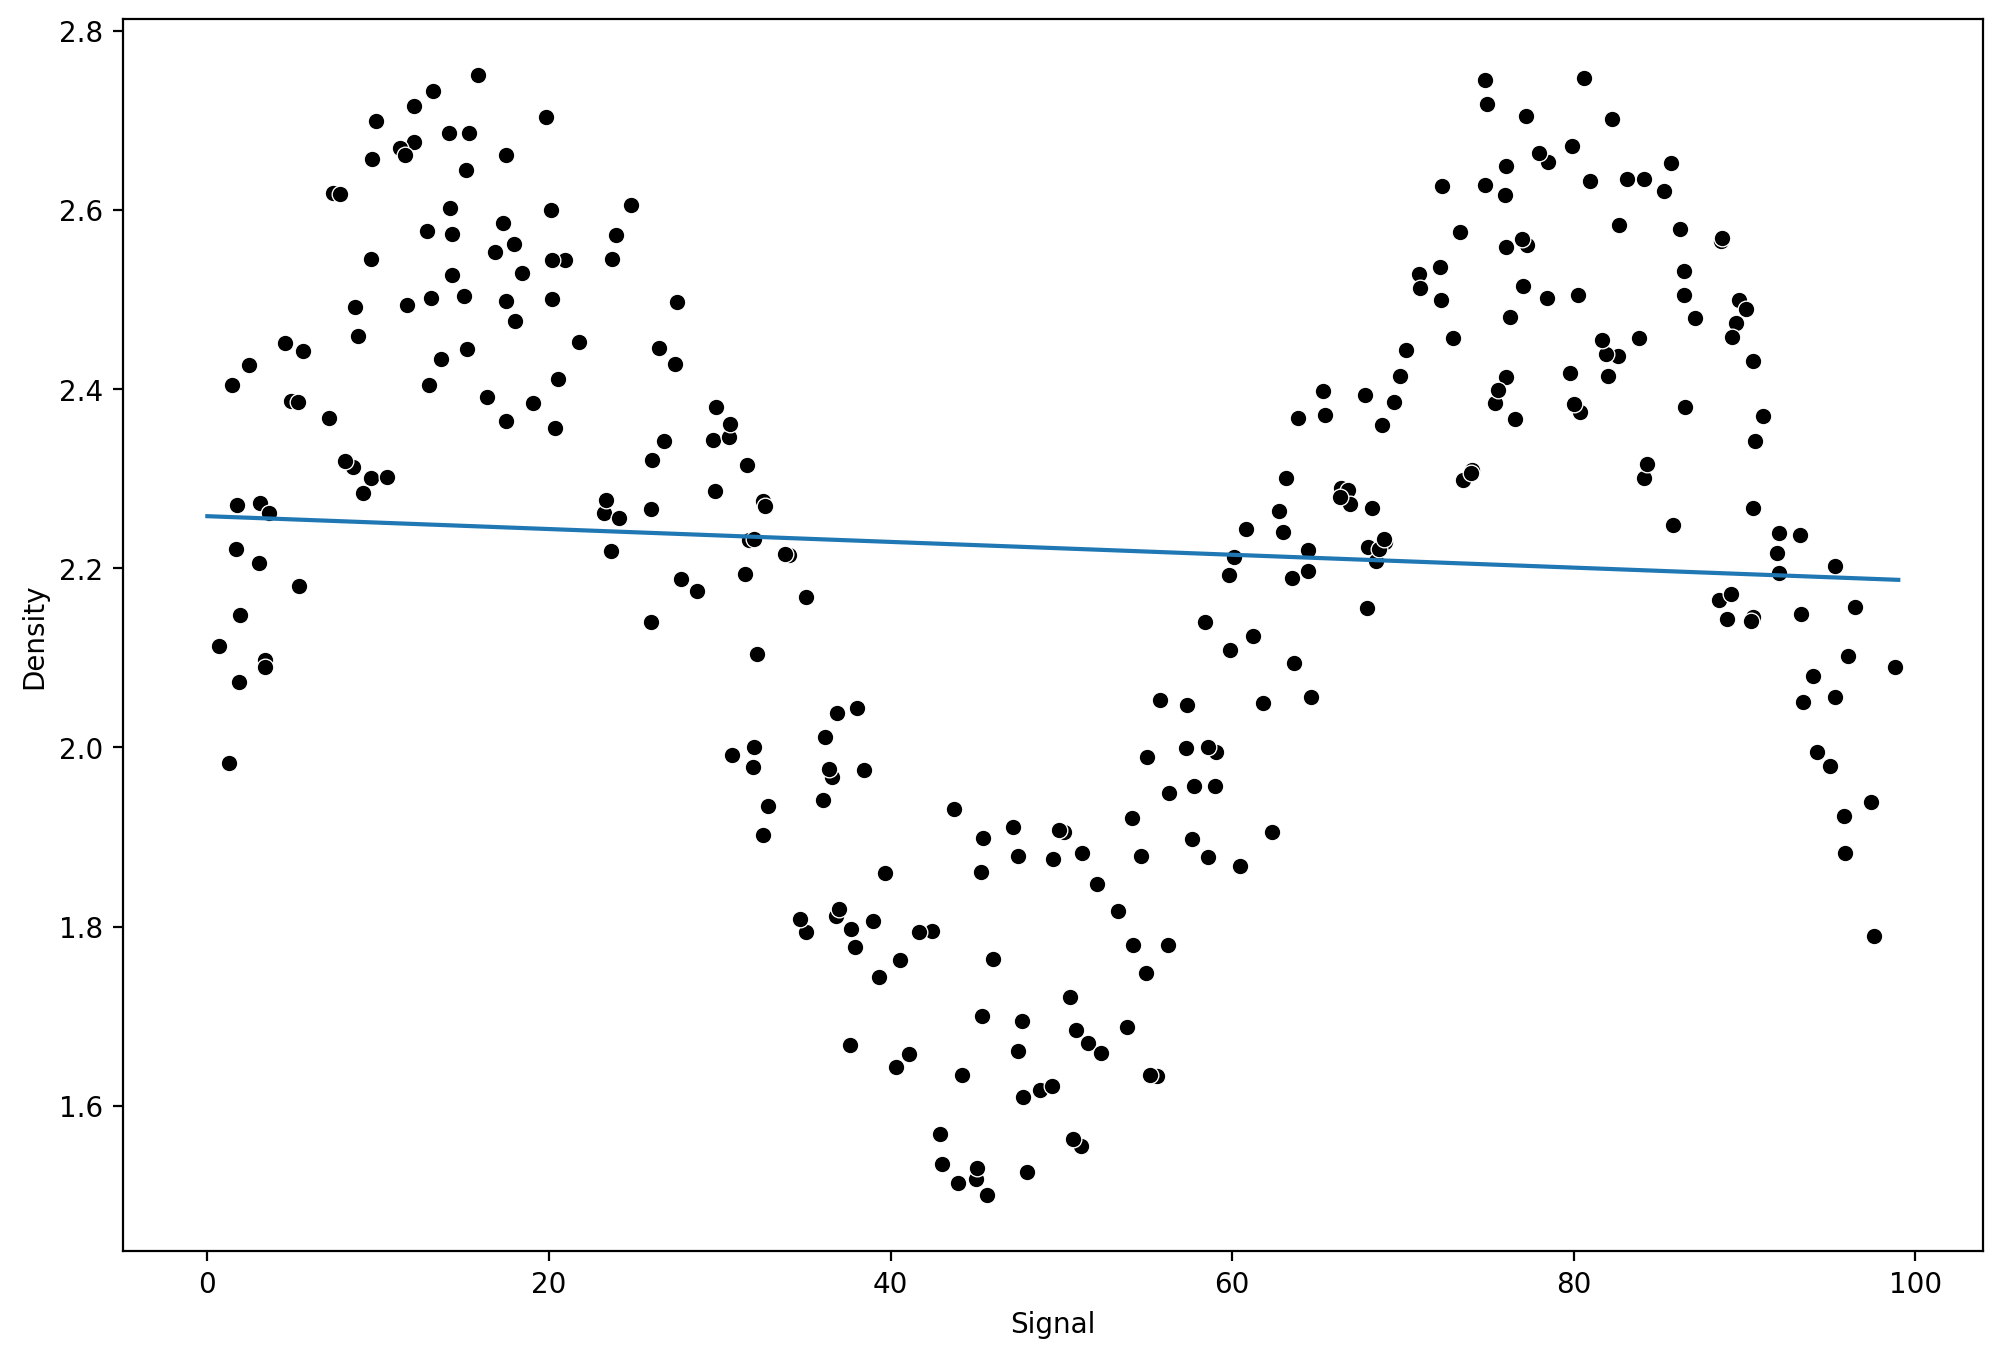

In [10]:
model = LinearRegression()
run_model(model, X_train, y_train, X_test, y_test)

### Polynomial regression

RMSE: 0.1519323590519495
MAE: 0.12731970688640432


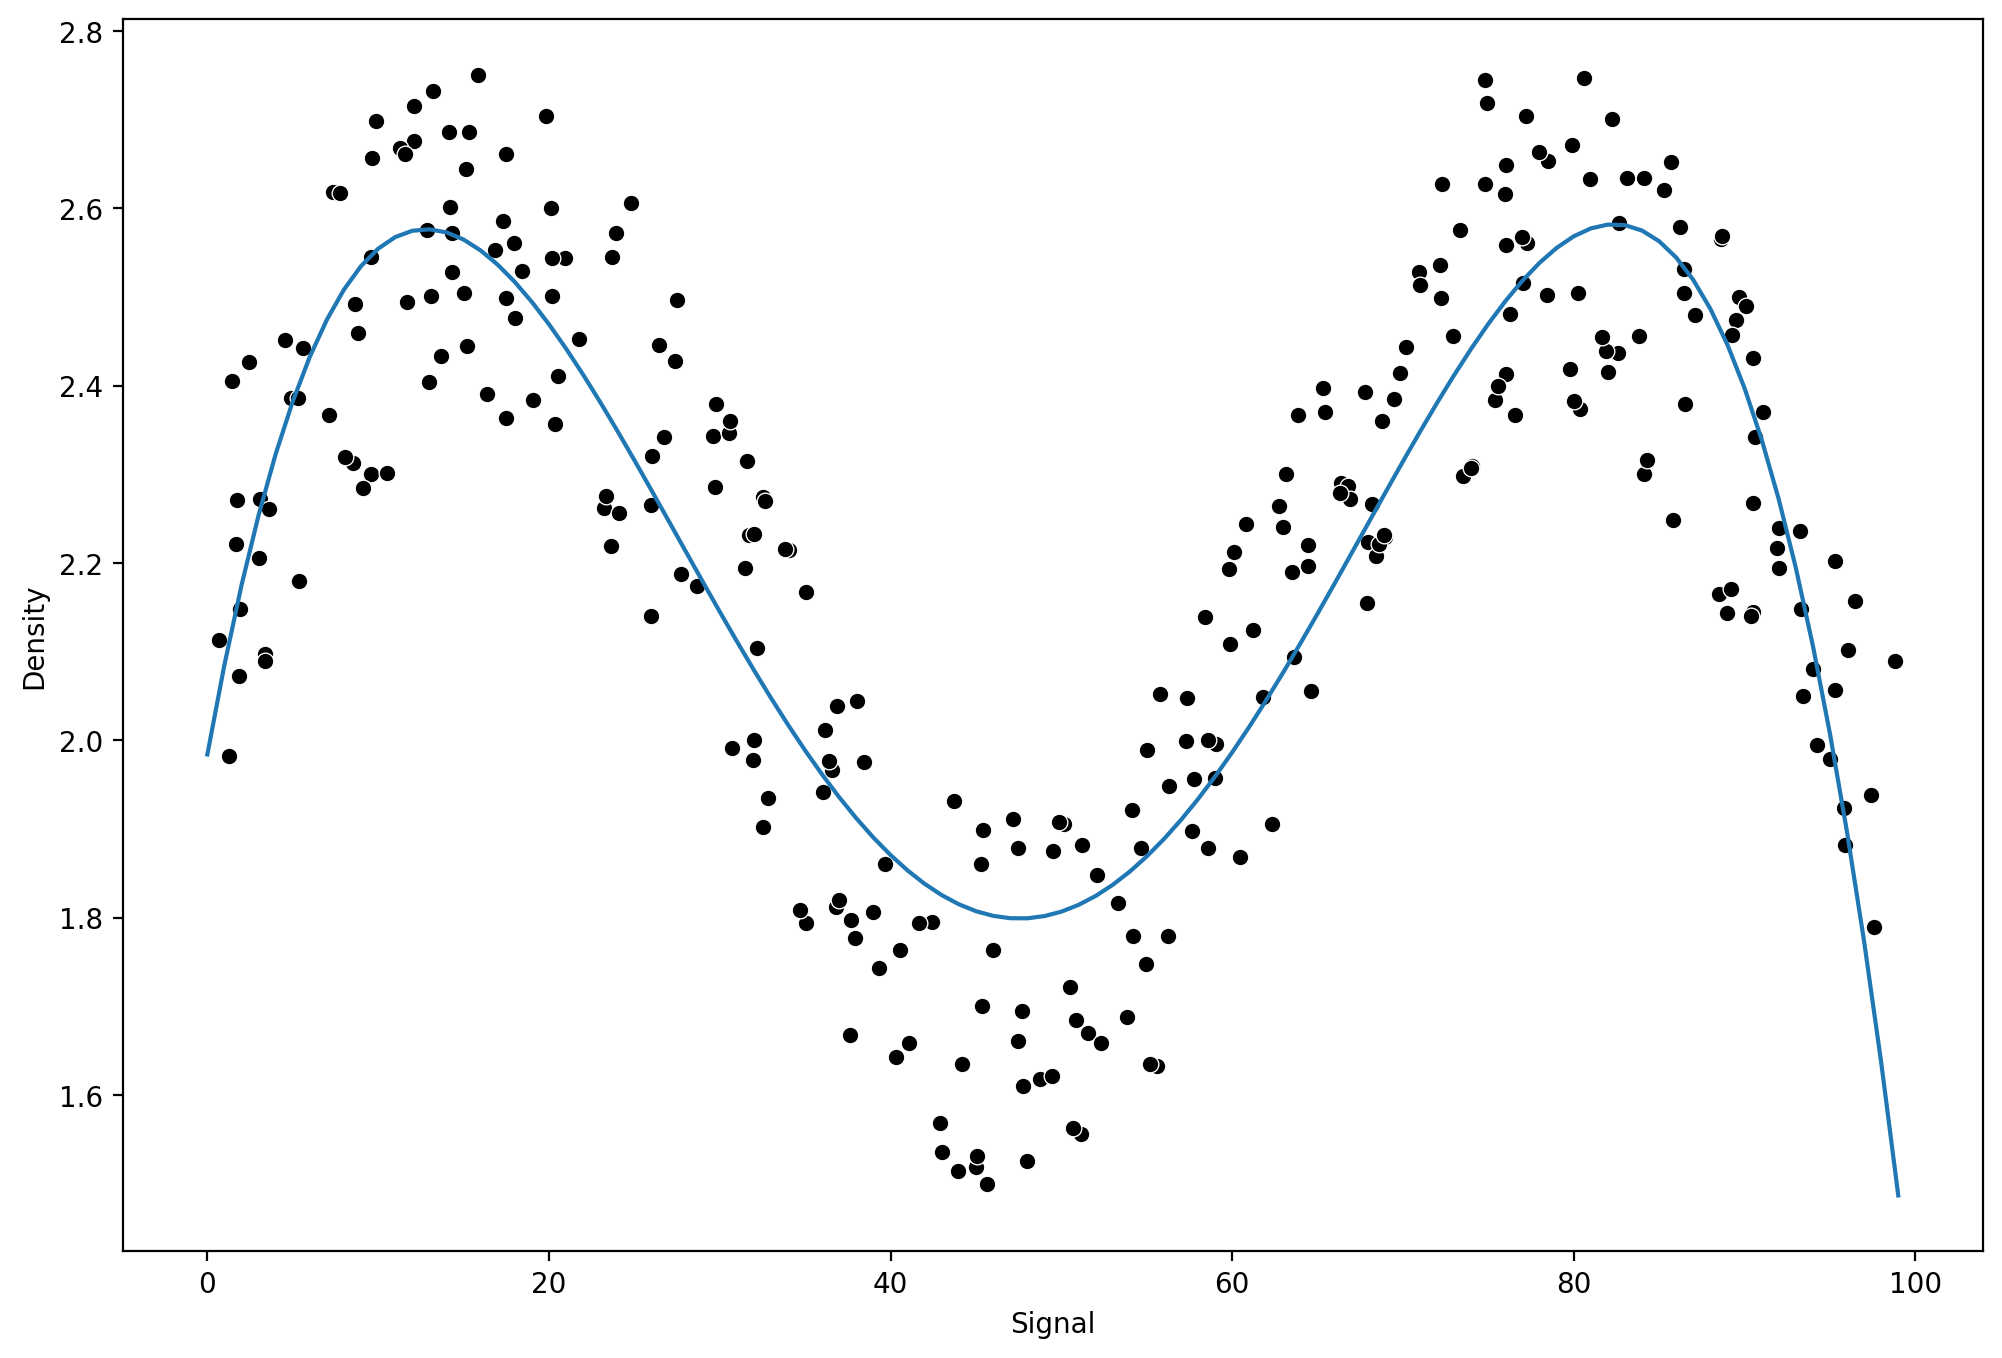

In [11]:
pipe = make_pipeline(PolynomialFeatures(degree=4), LinearRegression())
run_model(pipe, X_train, y_train, X_test, y_test)

RMSE: 0.14331847315826327
MAE: 0.12776576687032157


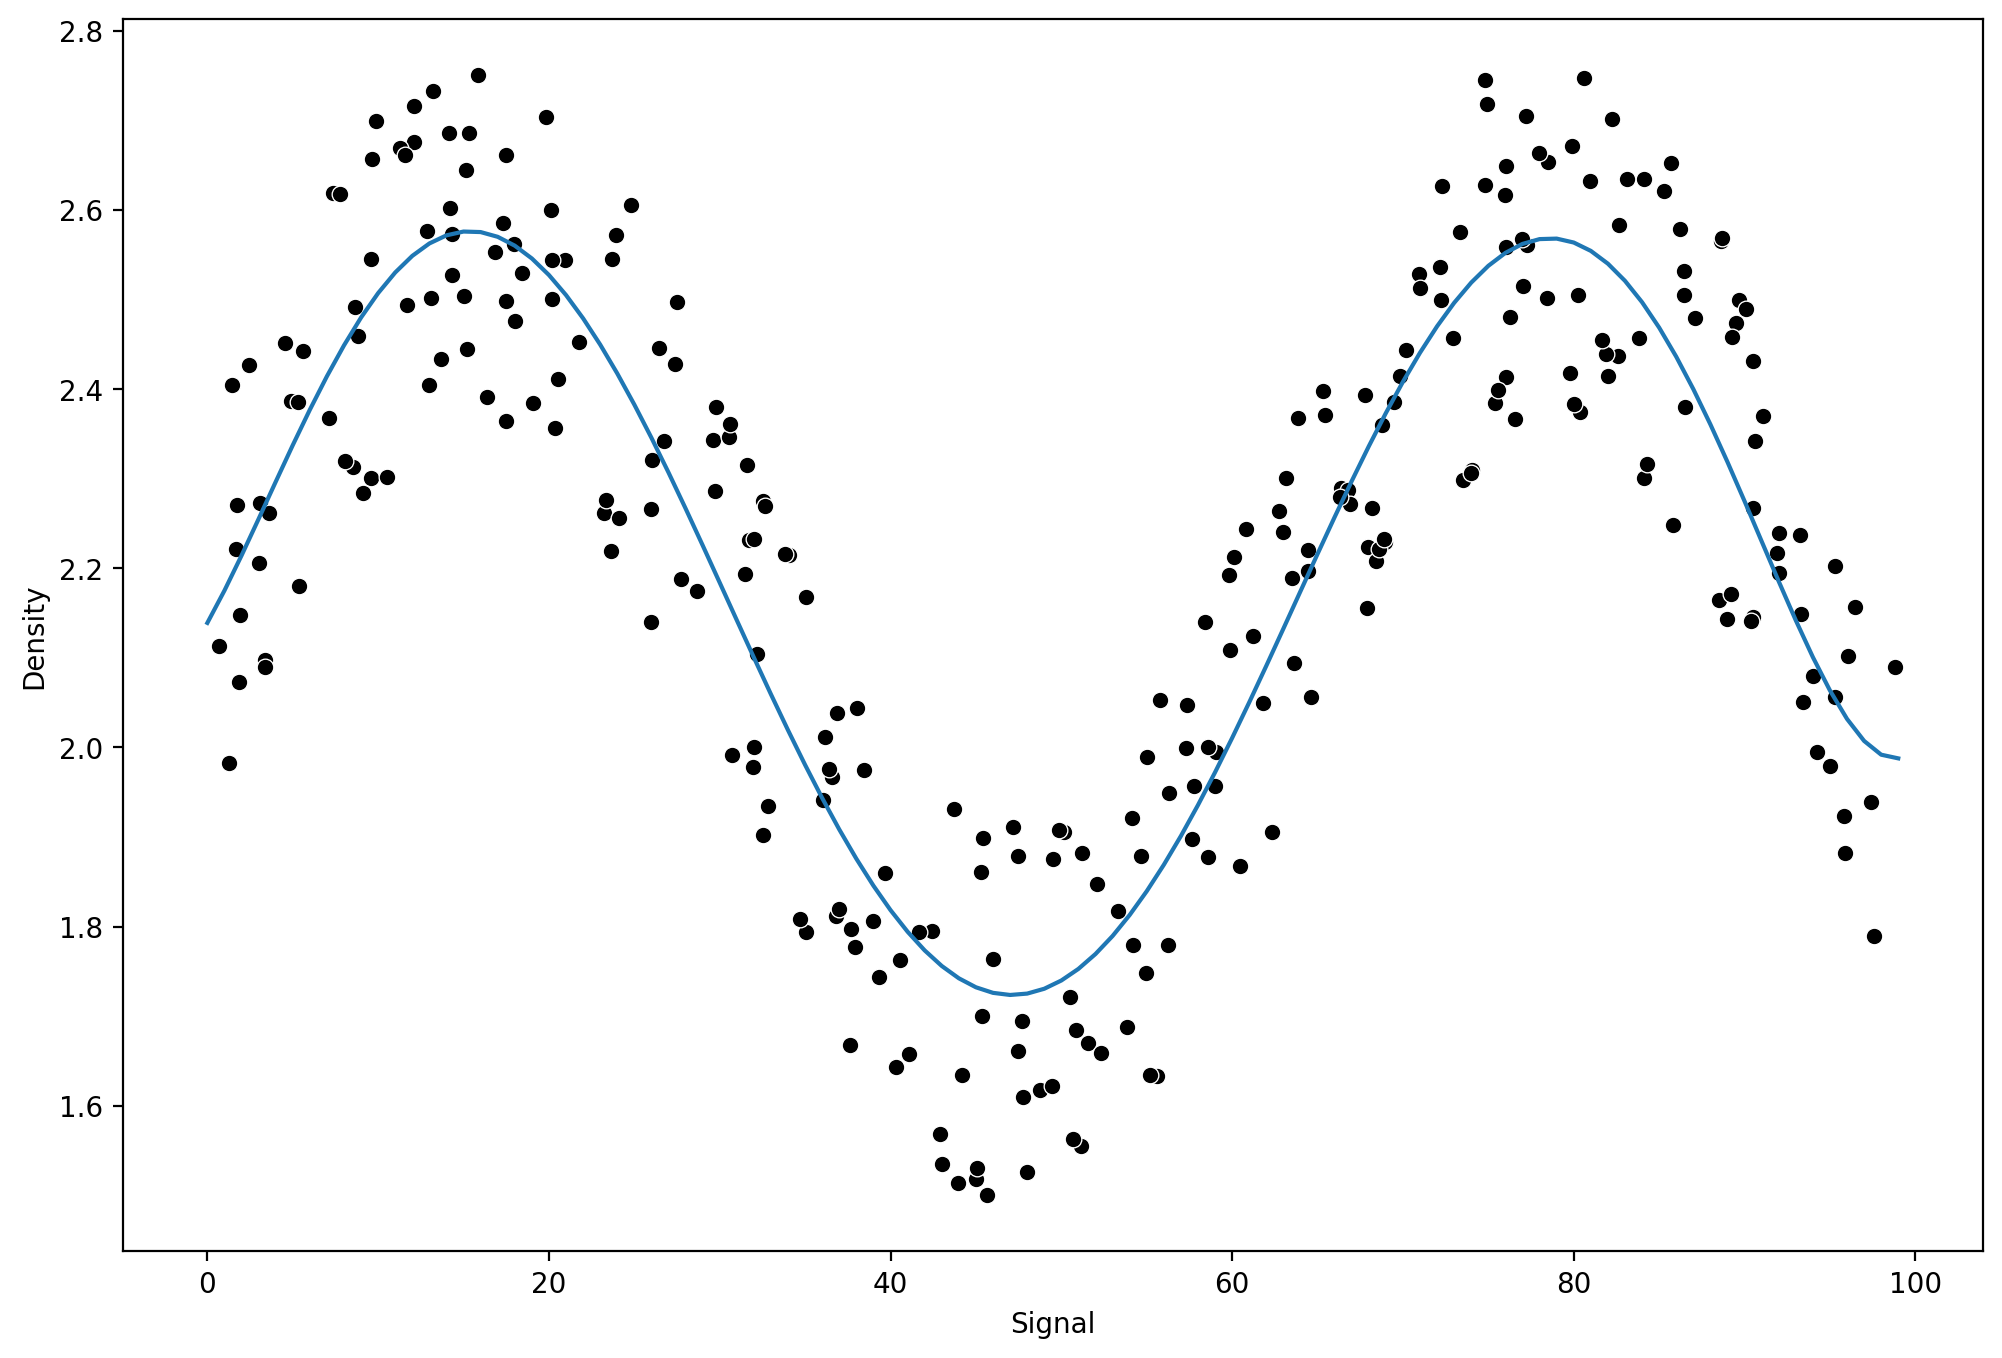

In [12]:
pipe = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())
run_model(pipe, X_train, y_train, X_test, y_test)

### K-Neighbors regressor

RMSE: 0.16631738413047167
MAE: 0.11903817237608924
RMSE: 0.14876656913494596
MAE: 0.12914730151577988
RMSE: 0.14614466625378272
MAE: 0.12674710216600582
RMSE: 0.1534844054554767
MAE: 0.1325037930668789


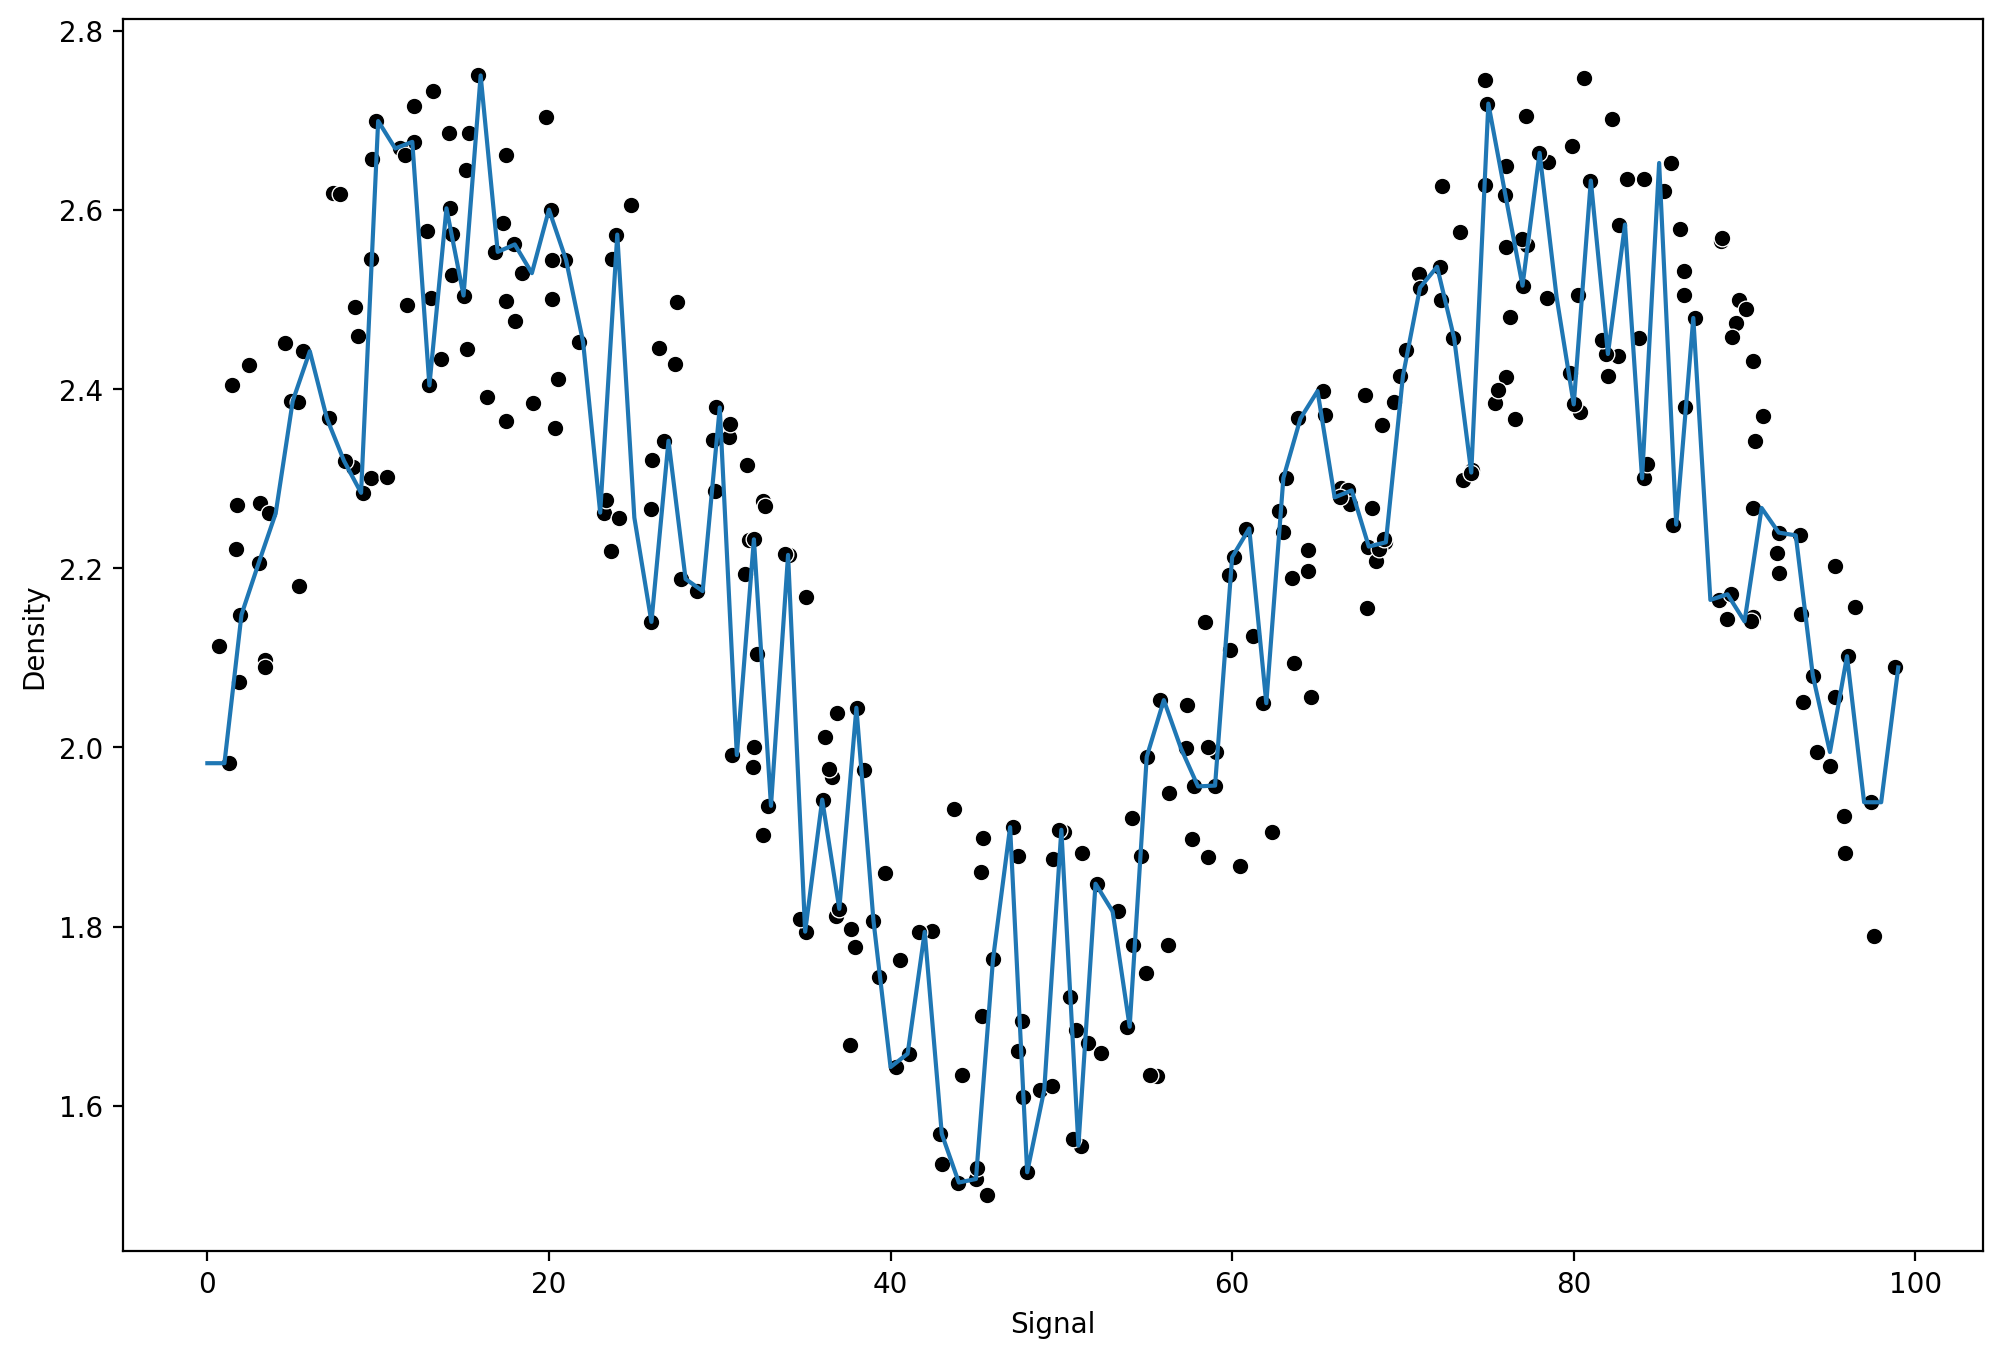

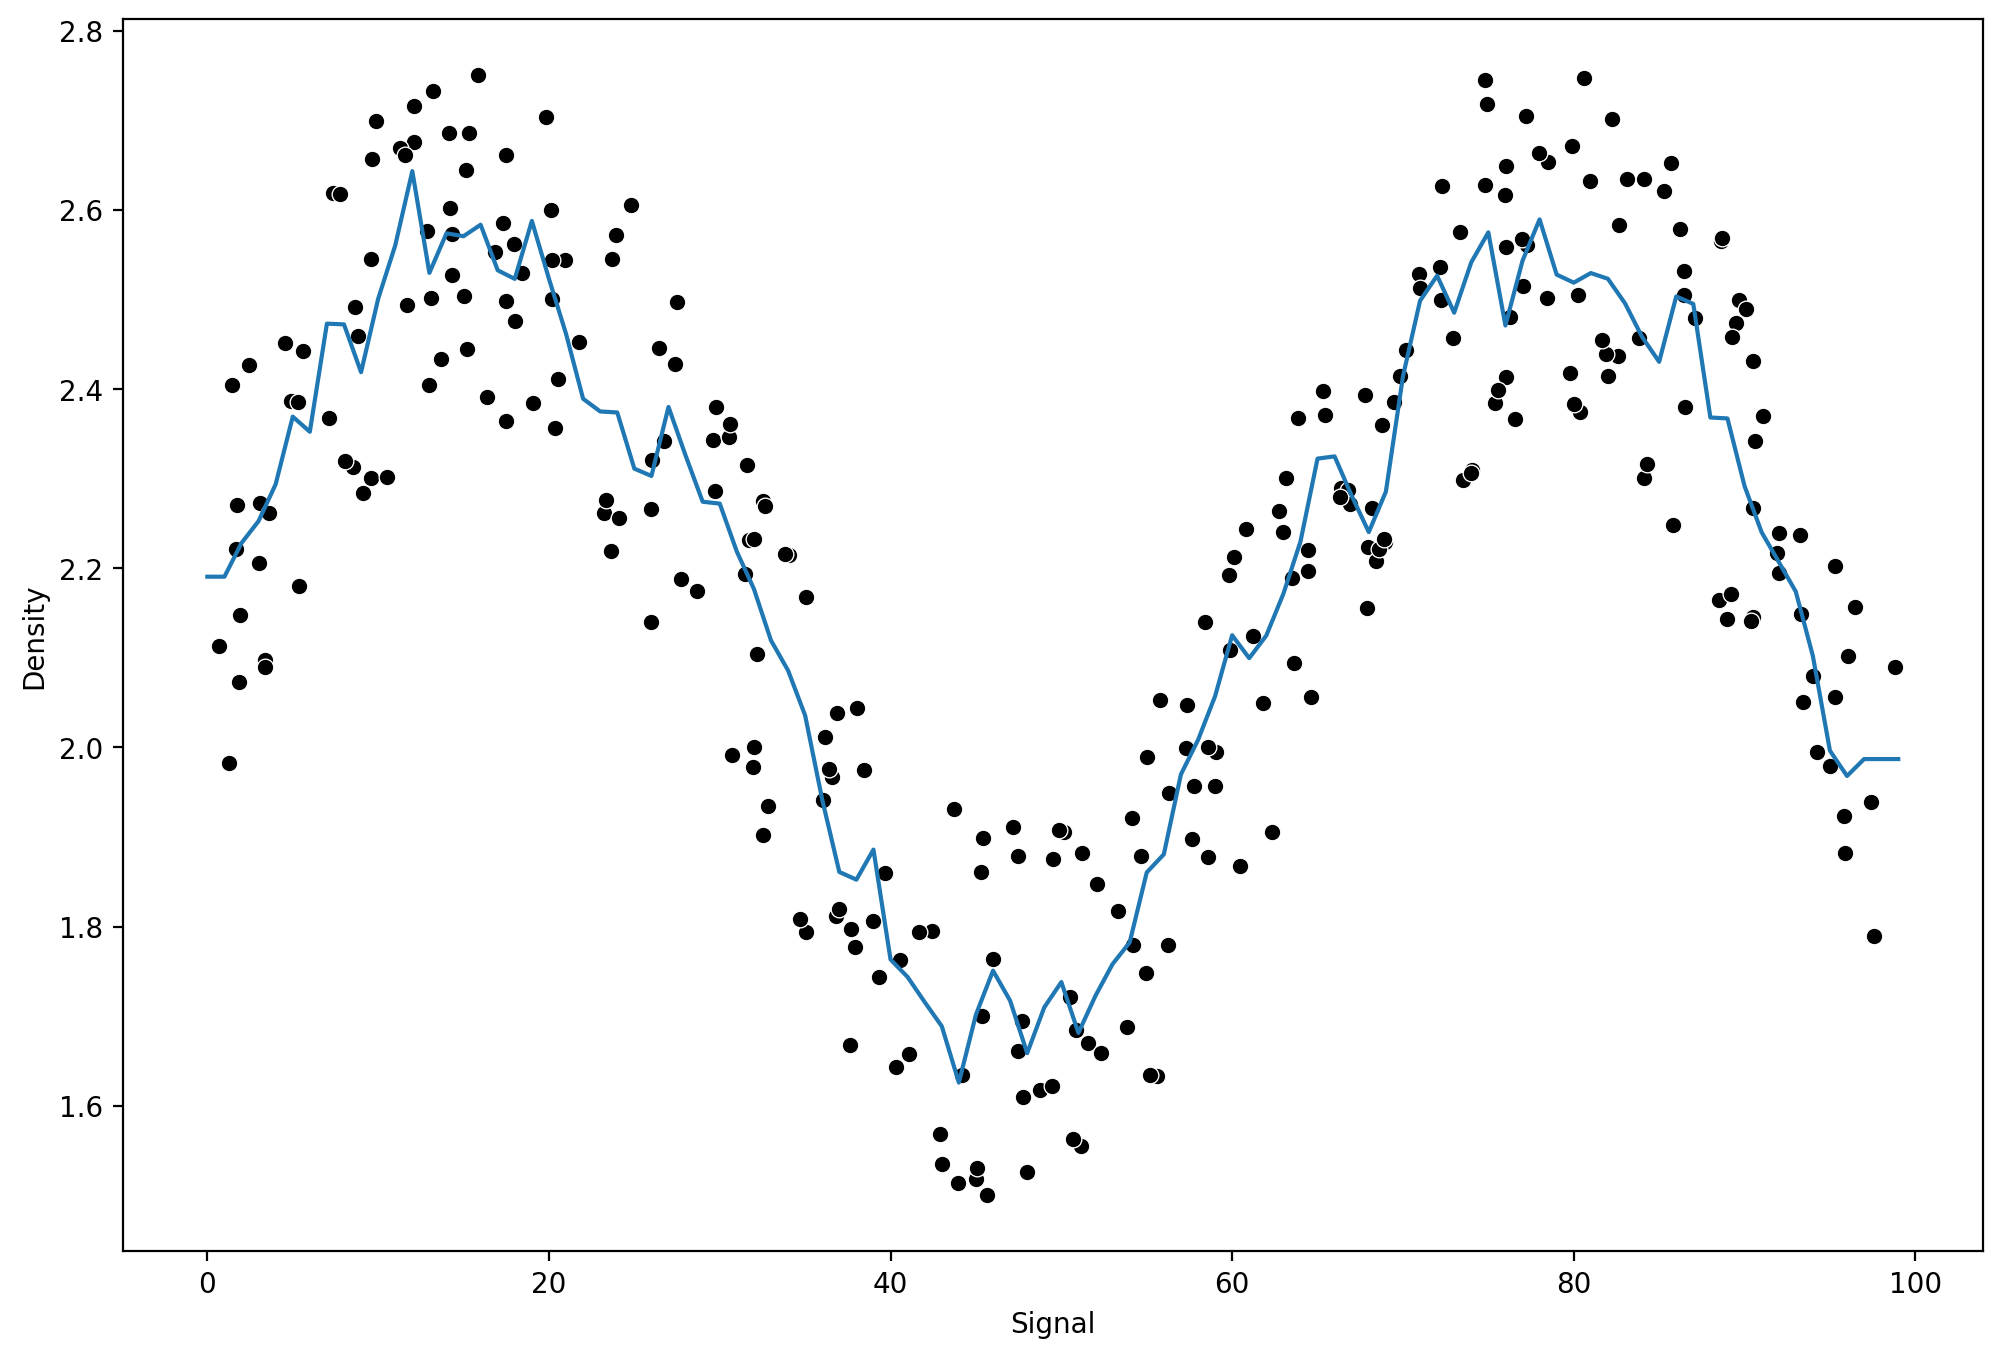

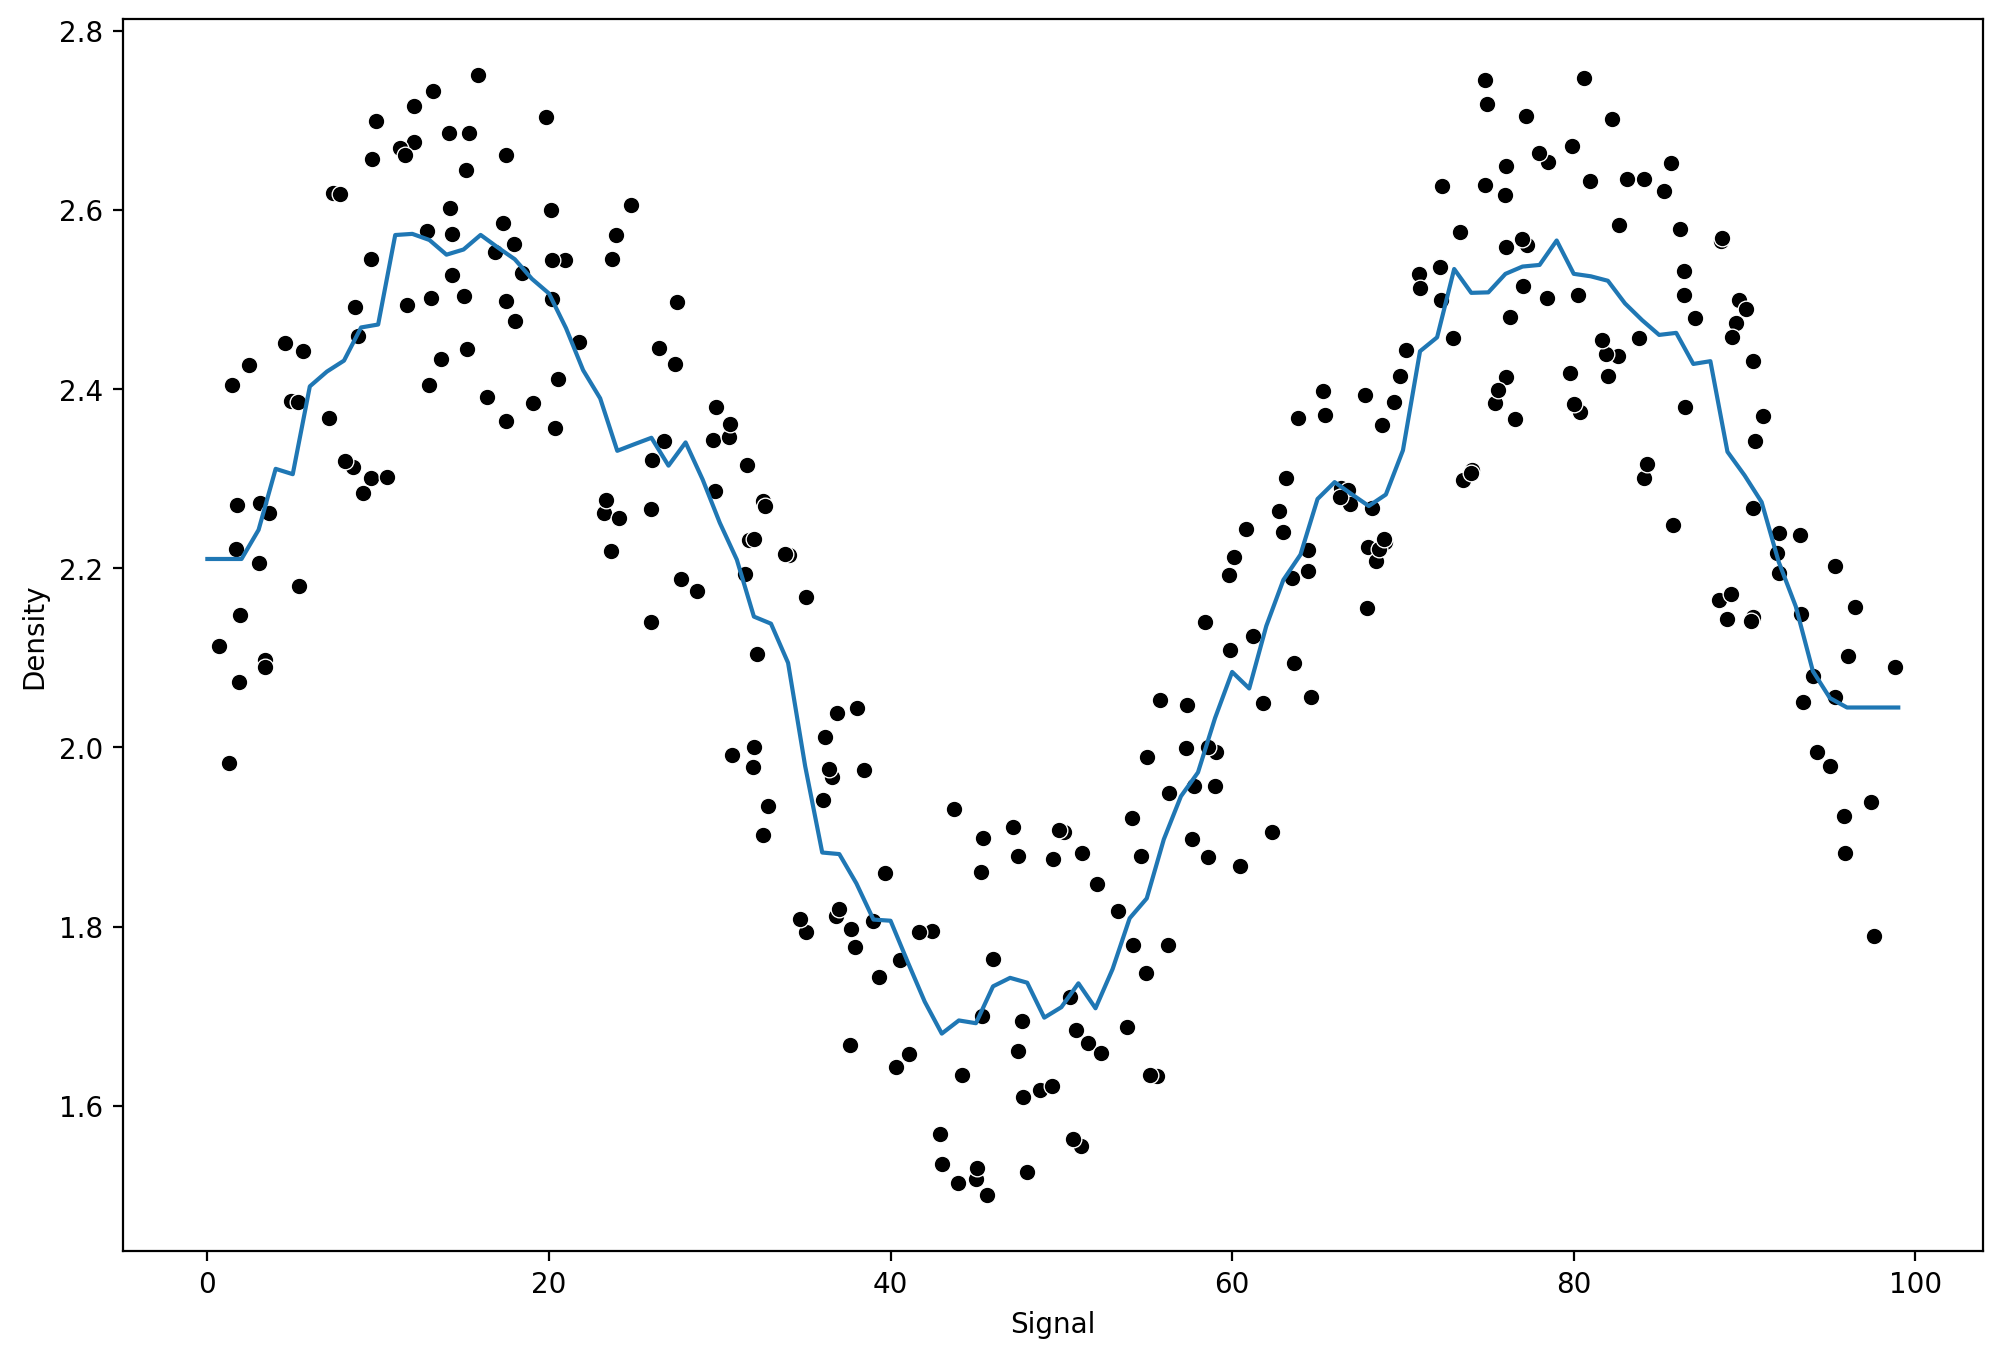

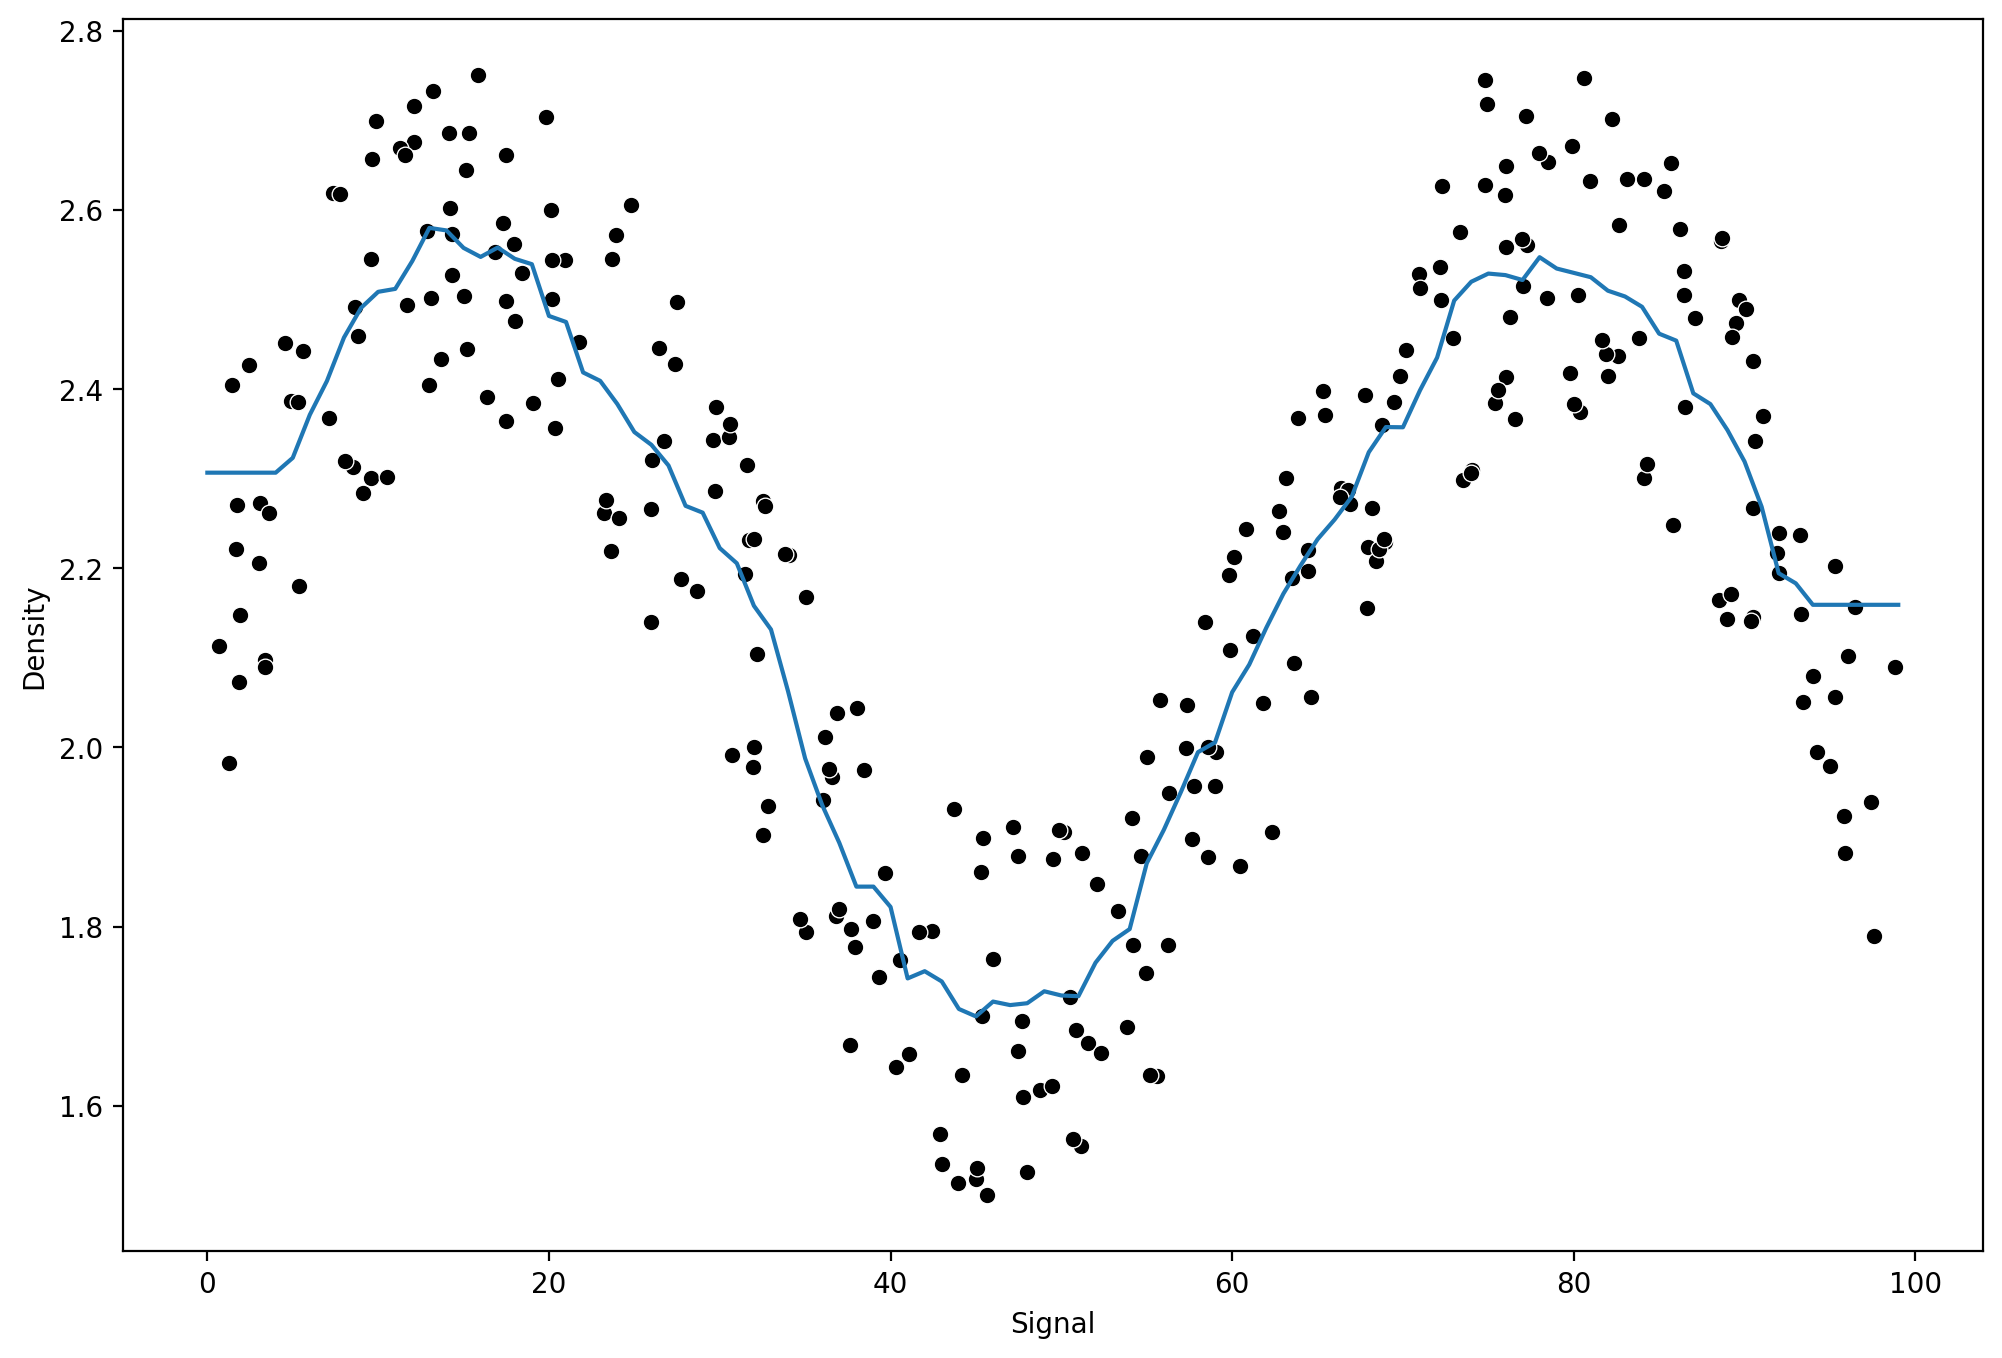

In [13]:
k_values = [1, 5, 10, 20]
for n in k_values:
	model = KNeighborsRegressor(n_neighbors=n)
	run_model(model, X_train, y_train, X_test, y_test)

### Decision Tree

RMSE: 0.16631738413047167
MAE: 0.11903817237608924


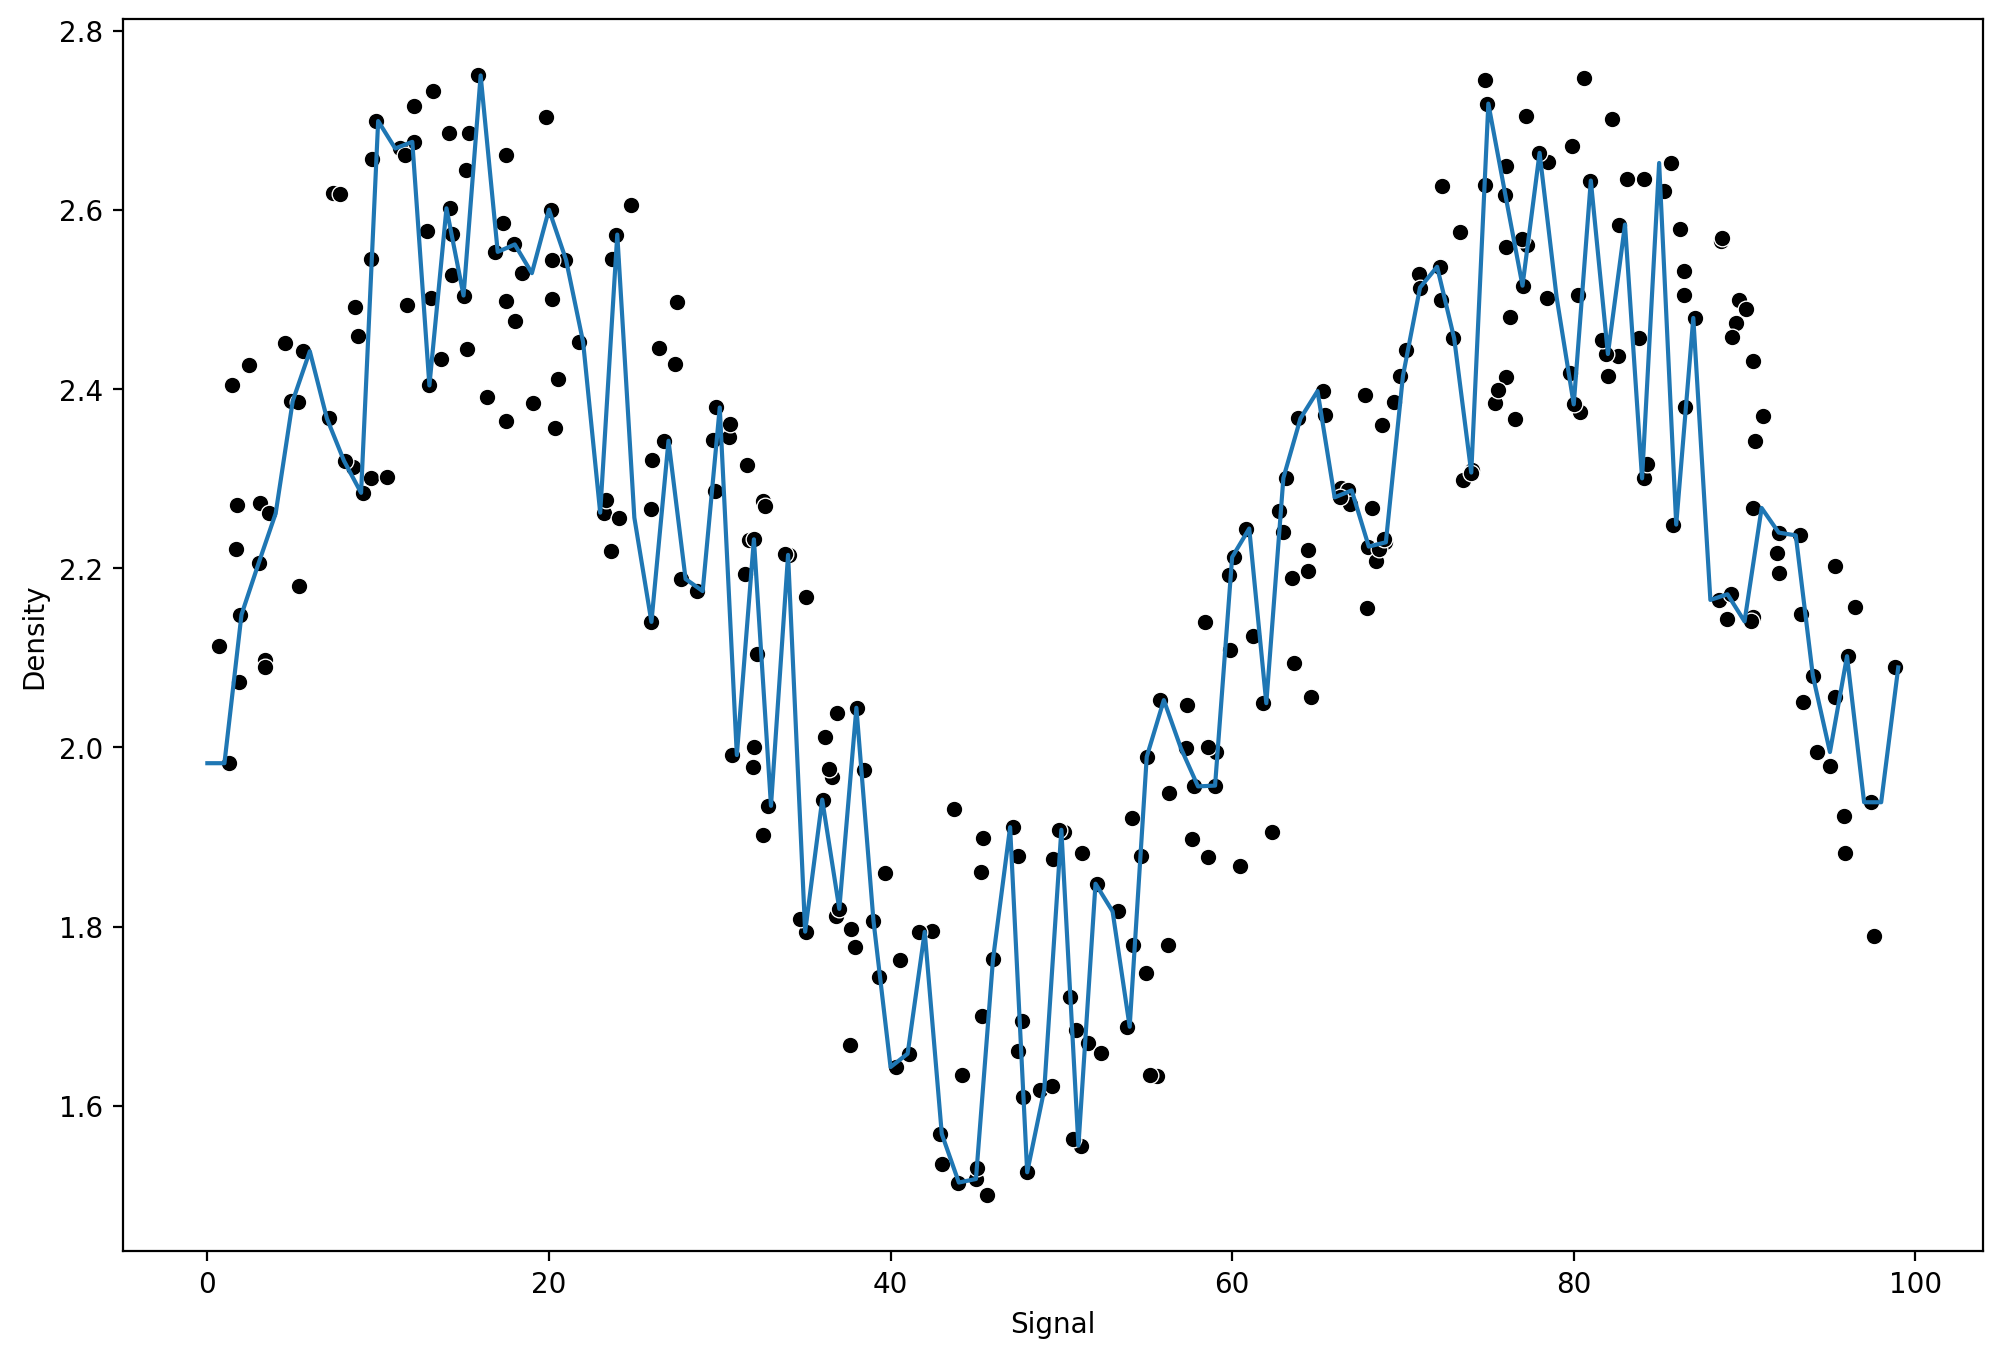

In [14]:
model = DecisionTreeRegressor()
run_model(model, X_train, y_train, X_test, y_test)

### Support Vector Machine regression

RMSE: 0.14350089737227528
MAE: 0.128024475604342


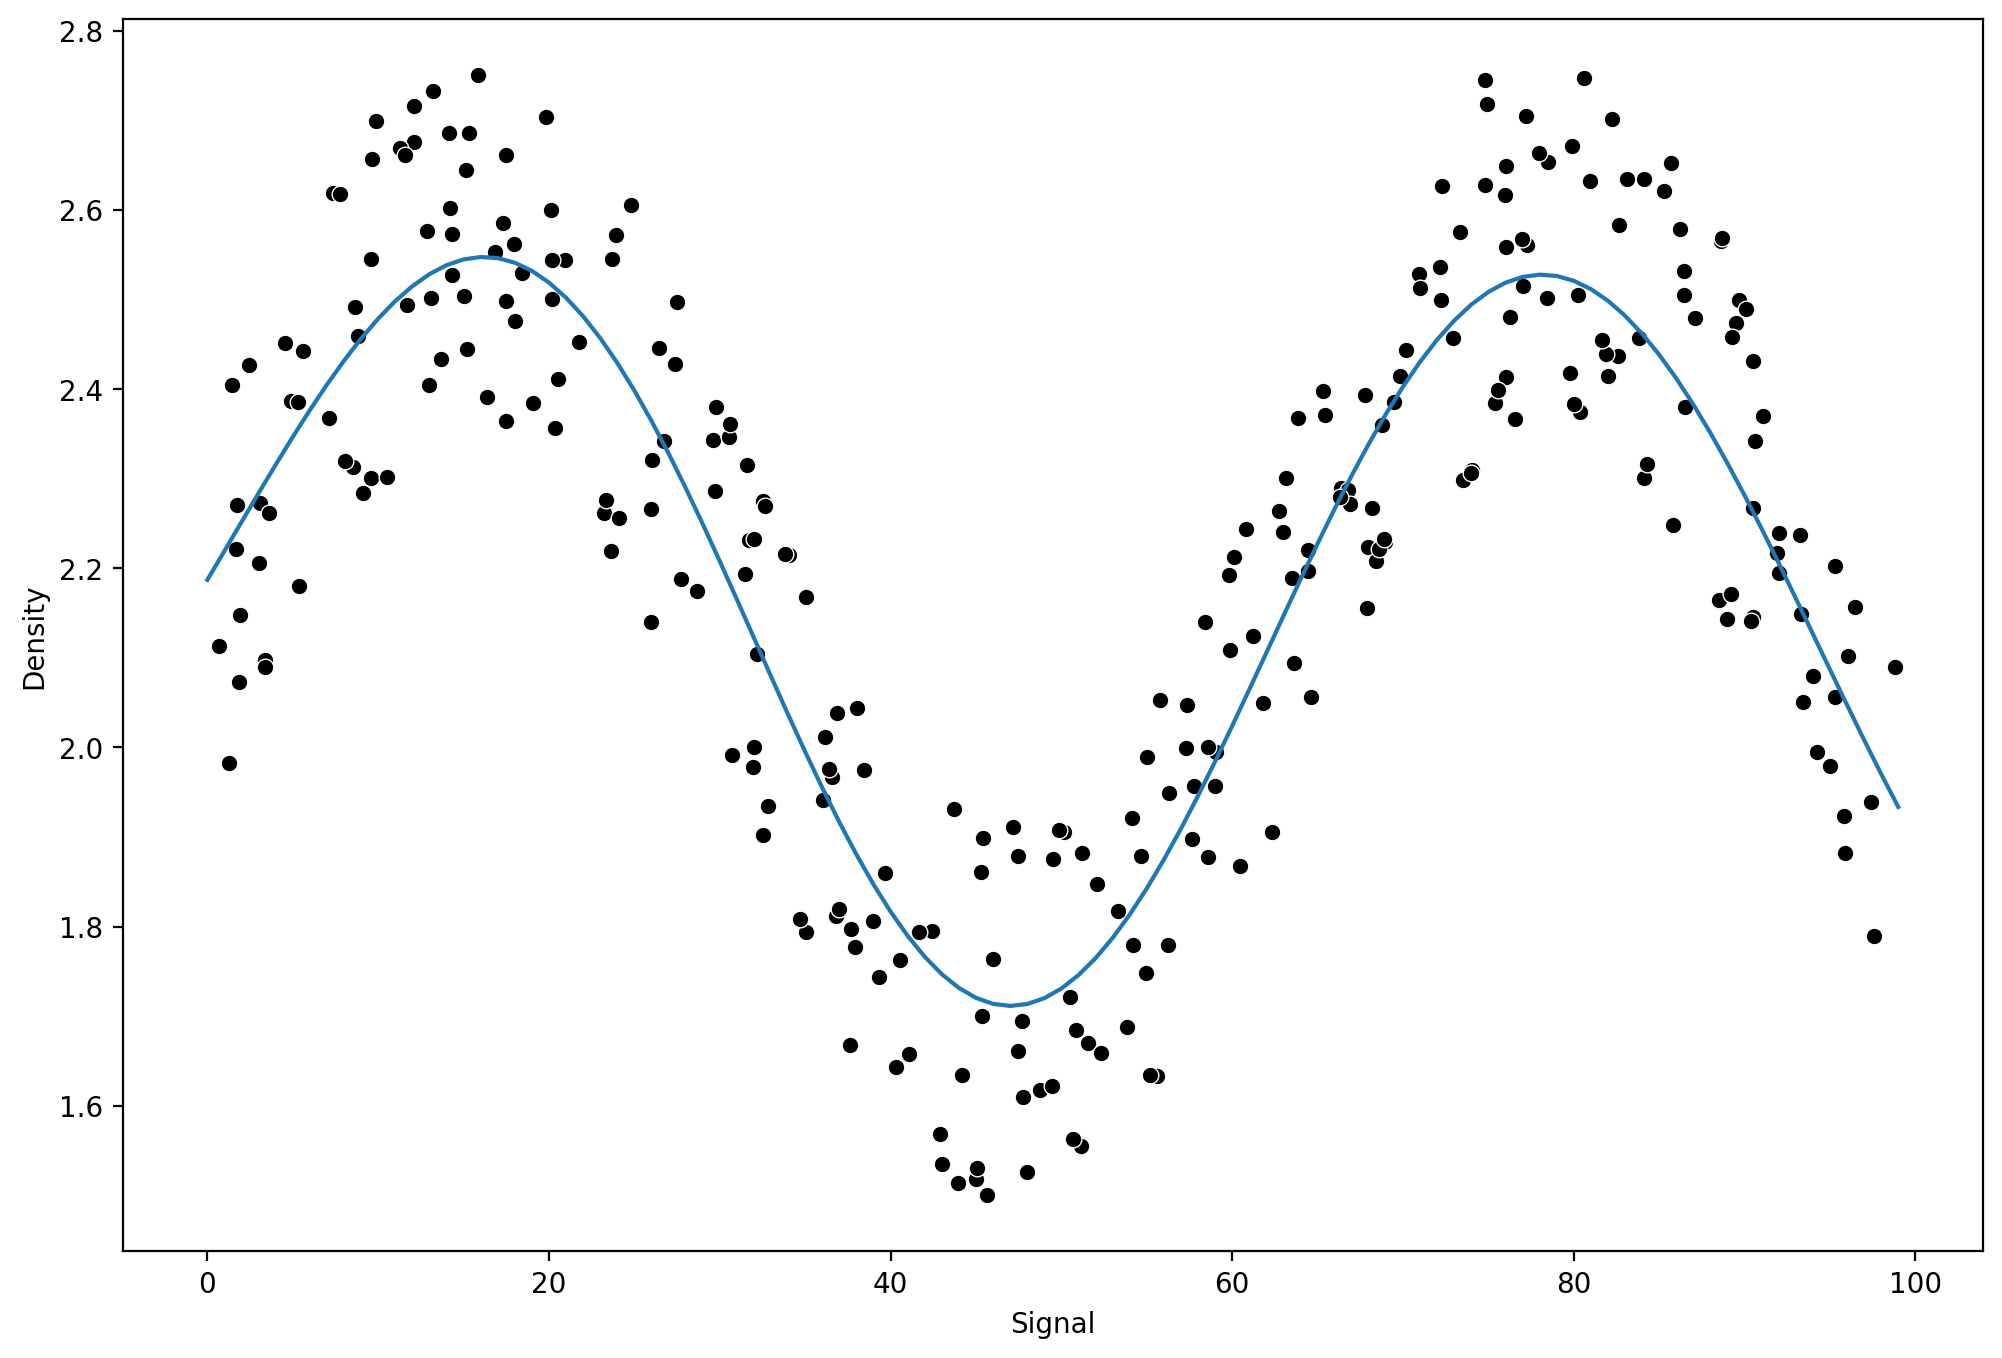

In [15]:
svr = SVR()
param_grid = ({'C':[0.01, 0.1, 1, 5, 10, 100, 1000],
						'gamma':['auto', 'scale']})

grid = GridSearchCV(svr, param_grid)
run_model(grid, X_train, y_train, X_test, y_test)

In [22]:
grid.best_params_

{'C': 1, 'gamma': 'scale'}

### Random forest regressor

RMSE: 0.15932864422482645
MAE: 0.1285985263701415


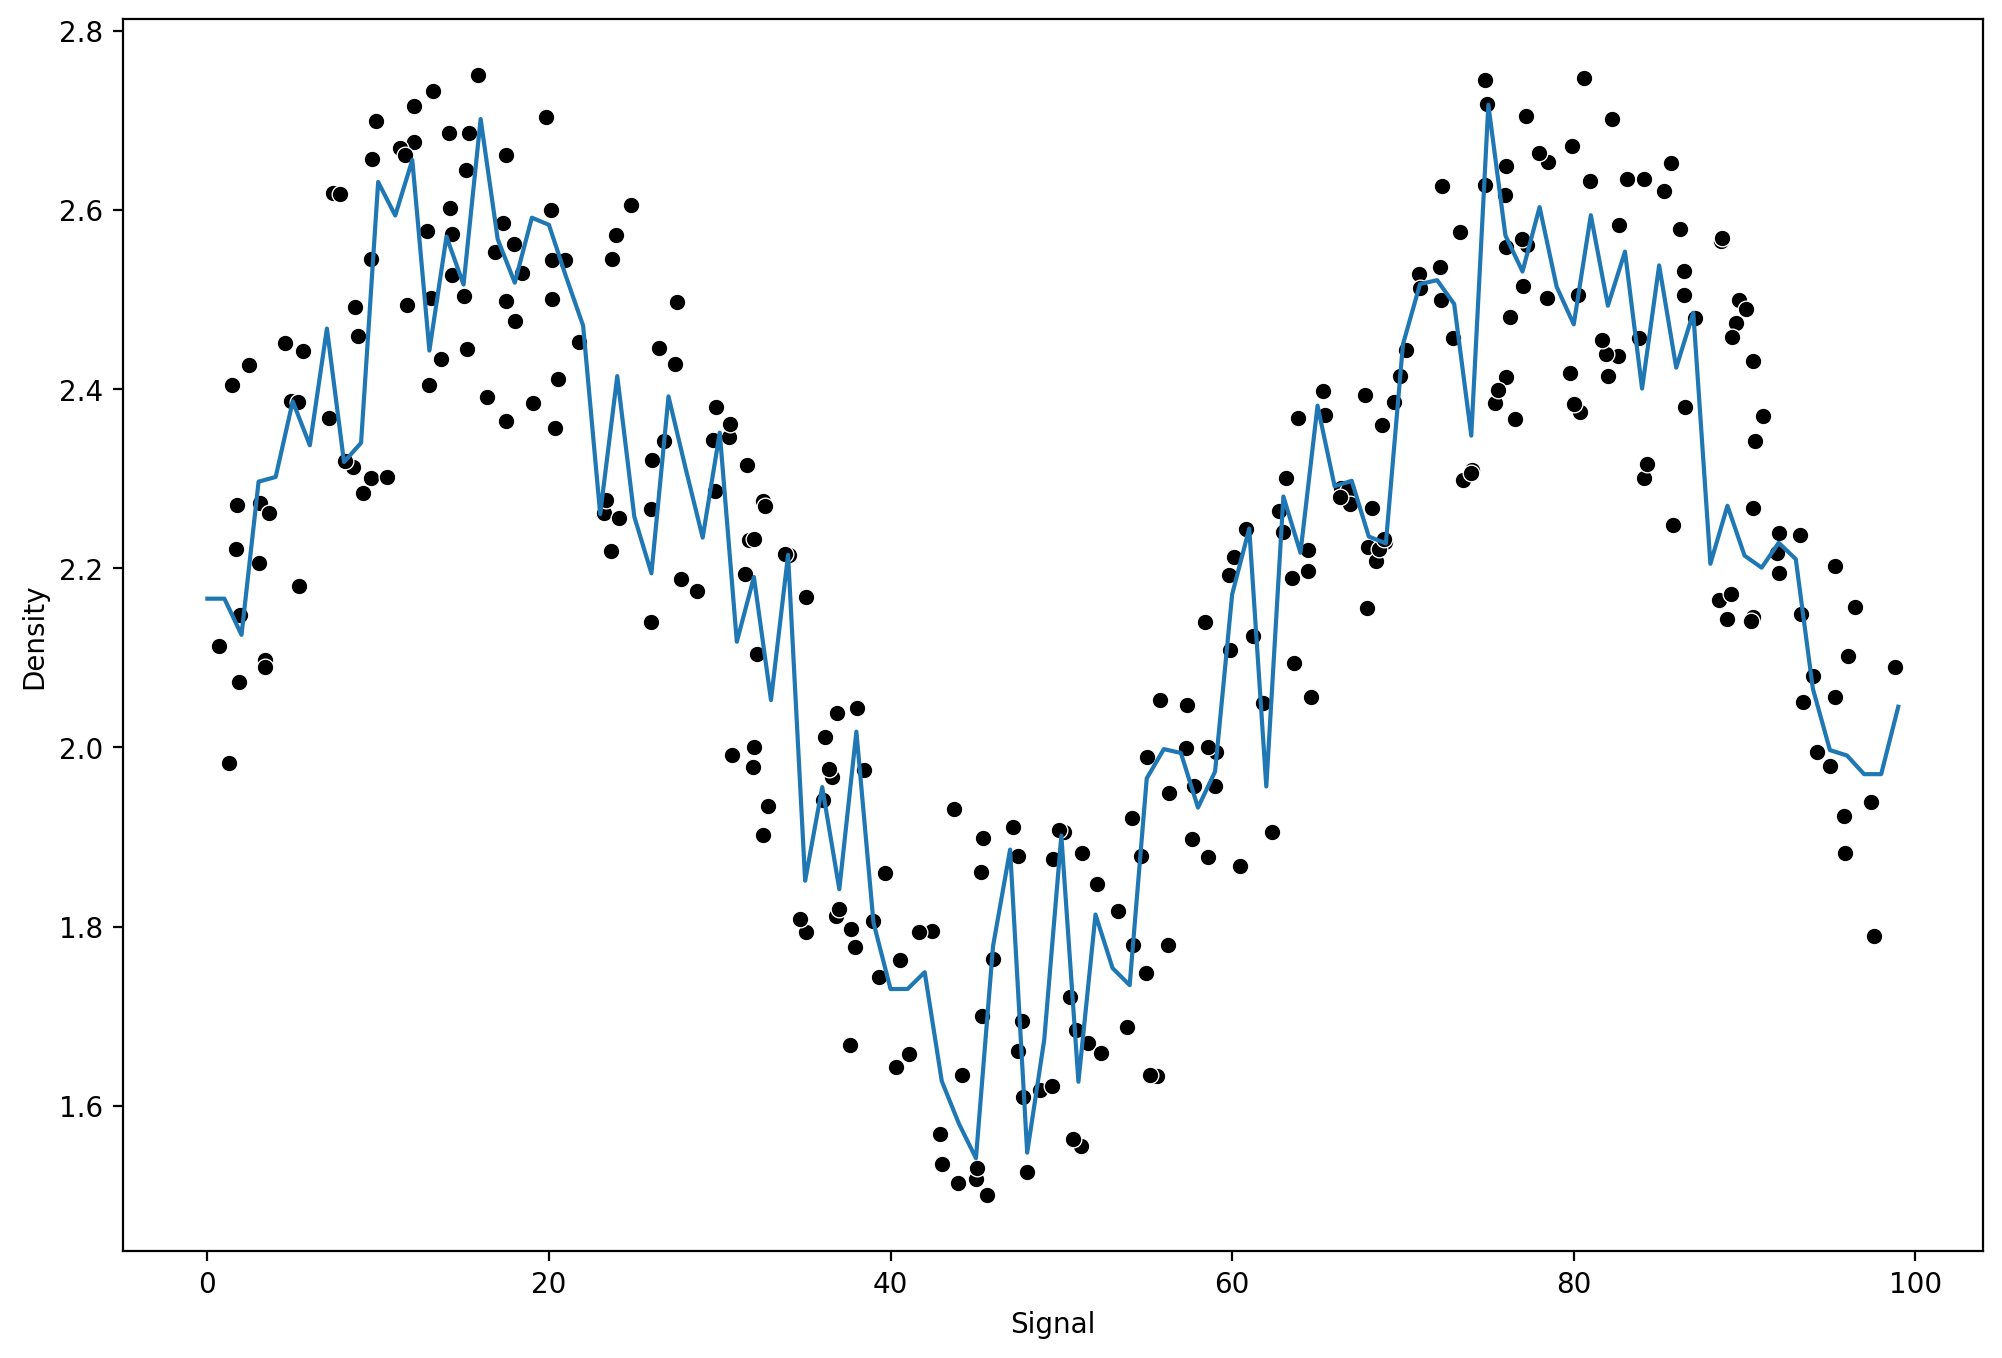

In [18]:
rfr = RandomForestRegressor(n_estimators=10)
run_model(rfr, X_train, y_train, X_test, y_test)

### Gradient Boosting

RMSE: 0.1484821813155971
MAE: 0.12761159125406576


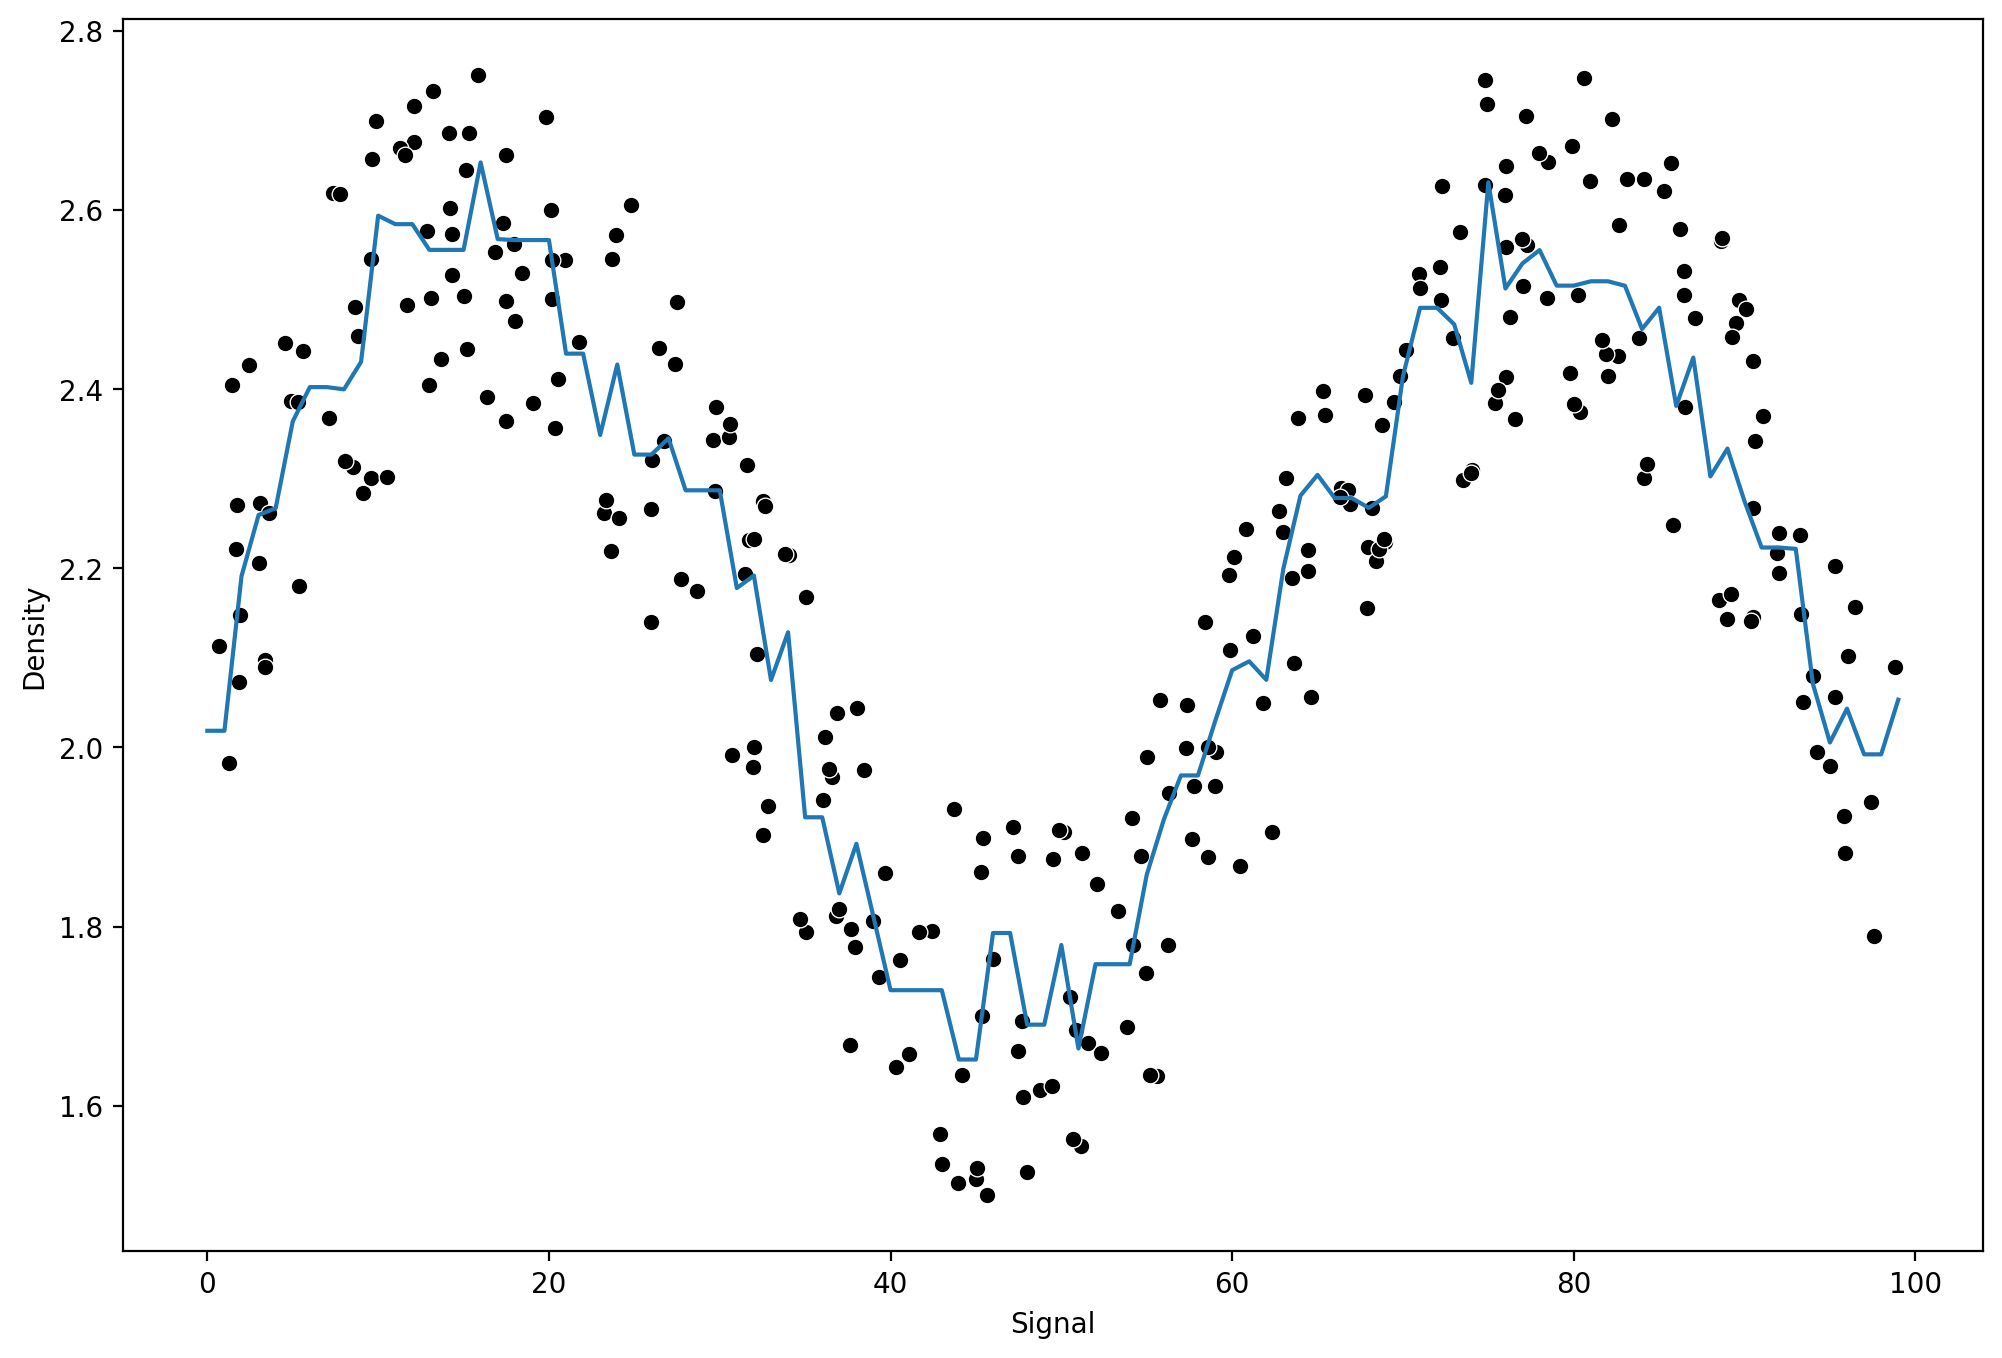

In [21]:
model = GradientBoostingRegressor()
run_model(model, X_train, y_train, X_test, y_test)

### AdaBoost

RMSE: 0.1513716641858
MAE: 0.13309581288444244


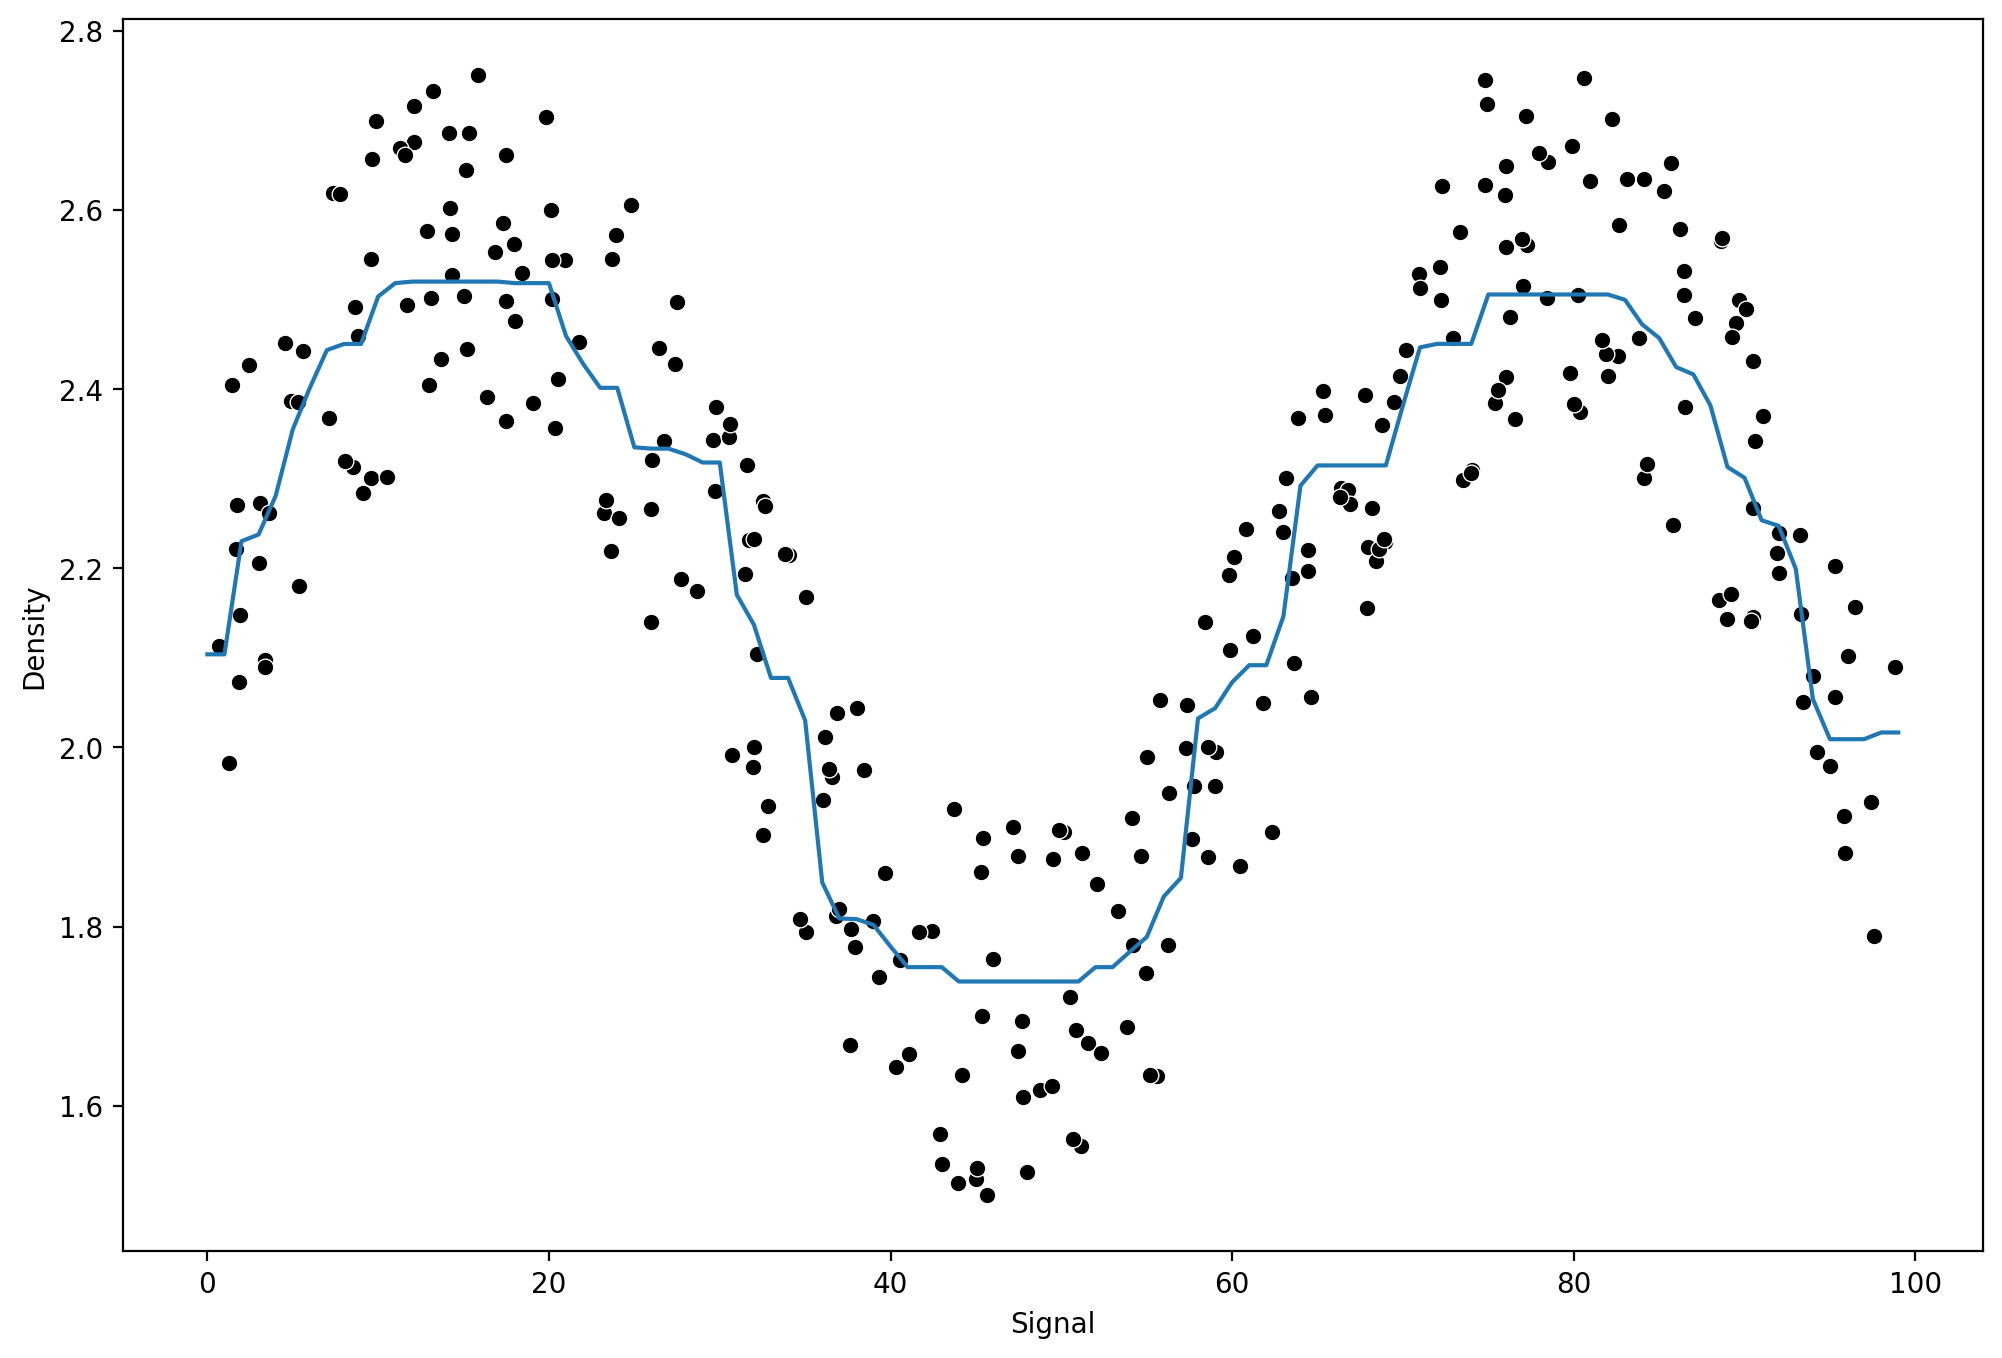

In [24]:
model = AdaBoostRegressor()
run_model(model, X_train, y_train, X_test, y_test)